In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

* genre: Type of song
* artist_name: Artist name 
* track_name: The name of the song
* track_id: The Spotify ID for the track.
* popularity: Popularity percentage of the song
* acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* danceability: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* duration_ms: The duration of the track in milliseconds.
* energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
* instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal.” The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
* mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".
* valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [2]:
df = pd.read_csv('C:/Users/mikha/ML_Projects/Data/SpotifyFeatures.csv')
df.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
df.shape

(232725, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [5]:
df.isnull().any()

genre               False
artist_name         False
track_name          False
track_id            False
popularity          False
acousticness        False
danceability        False
duration_ms         False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
speechiness         False
tempo               False
time_signature      False
valence             False
dtype: bool

**Check for dublicates**


In [6]:
df.track_id.unique().shape

(176774,)

In [7]:
df_un = df.copy()
df = df.drop_duplicates("track_id")

In [8]:
df_un.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [9]:
print(df.shape, df_un.shape)

(176774, 18) (232725, 18)


In [10]:
df.head(20)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.8140
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.8160
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.3680
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.2270
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.3900
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.000000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.3580
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,0.000000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.5330
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,0.000000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.2740
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.000860,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.7650
9,Movie,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,0.001250,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.7180


In [11]:
df_un.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


**There are a lot of duplicates, because the song can relate to several genres. We need to deal with it.**

In [12]:
print(df_un.genre.unique())
len(df_un.genre.unique())

['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music"
 'Children’s Music' 'Rap' 'Indie' 'Classical' 'Pop' 'Reggae' 'Reggaeton'
 'Jazz' 'Rock' 'Ska' 'Comedy' 'Soul' 'Soundtrack' 'World']


27

We have dublicated genre Children's Music.

In [13]:
df_un.loc[df_un['genre'] == "Children's Music", 'genre'] = 'Children’s Music'
df_un.genre.unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       'Children’s Music', 'Rap', 'Indie', 'Classical', 'Pop', 'Reggae',
       'Reggaeton', 'Jazz', 'Rock', 'Ska', 'Comedy', 'Soul', 'Soundtrack',
       'World'], dtype=object)

У нас есть инд дубликатов. Можно взять первое вхожд дубликата и пройтись по остальным вхожд, чтобы собрать информ. Нужно доб 
нов столбец. Have 26 genres

<AxesSubplot:xlabel='genre', ylabel='popularity'>

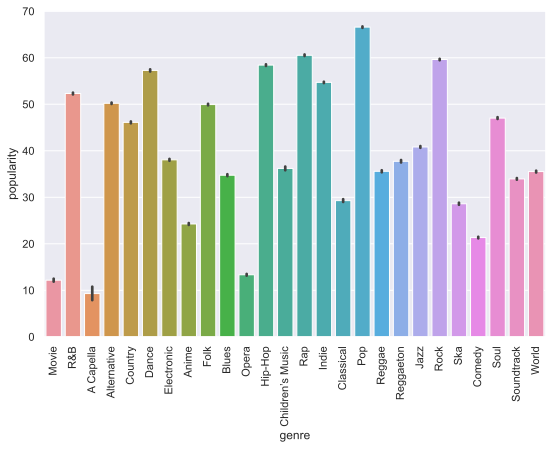

In [14]:
f, ax = plt.subplots(figsize=(9, 6))
plt.xticks(rotation=90)
sns.barplot(x="genre", y="popularity", data=df_un, ax=ax)

I will take 10 the most popular genres and implement One-Hot Encoding. The most popular are: Pop, Rap, Rock, Hip-Hop, Dance, Indie, R&B, Alternative, Folk, Soul.

In [20]:
genres = df_un.genre.unique()
for gen in genres:
    df_un[gen] = False
df_un = df_un.set_index('track_id')

for genre in genres:
    df_un.loc[df_un.genre.isin([genre]), genre] = True


,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,...,Pop,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World
track_id,,,,,,,,,,,,,,,,,,,,,
0BRjO6ga9RKCKjfDqeFgWV,Movie,Henri Salvador,C'est beau de faire un Show,0,0.61100,0.389,99373,0.910,0.000000,C#,...,False,False,False,False,False,False,False,False,False,False
0BjC1NfoEOOusryehmNudP,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.24600,0.590,137373,0.737,0.000000,F#,...,False,False,False,False,False,False,False,False,False,False
0CoSDzoNIKCRs124s9uTVy,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.95200,0.663,170267,0.131,0.000000,C,...,False,False,False,False,False,False,False,False,False,False
0Gc6TVm52BwZD07Ki6tIvf,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.70300,0.240,152427,0.326,0.000000,C#,...,False,False,False,False,False,False,False,False,False,False
0IuslXpMROHdEPvSl1fTQK,Movie,Fabien Nataf,Ouverture,4,0.95000,0.331,82625,0.225,0.123000,F,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2XGLdVl7lGeq8ksM6Al7jT,Soul,Slave,Son Of Slide,39,0.00384,0.687,326240,0.714,0.544000,D,...,False,False,False,False,False,False,False,False,False,False
1qWZdkBl4UVPj9lK6HuuFM,Soul,Jr Thomas & The Volcanos,Burning Fire,38,0.03290,0.785,282447,0.683,0.000880,E,...,False,False,False,False,False,False,False,False,False,False
2ziWXUmQLrXTiYjCg2fZ2t,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,47,0.90100,0.517,166960,0.419,0.000000,D,...,False,False,False,False,False,False,False,False,False,False


7    Movie
8    Movie
9    Movie
Name: genre, dtype: object

In [16]:
name = ""
count = 0
first_entry = 0
for index, row in df_un.sort_values(by=['track_id']).iterrows():
    

IndentationError: expected an indented block (Temp/ipykernel_10252/936902962.py, line 5)



**Let's check the correlation between numeric features**


In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
corr_matrix = df_un.corr()
sns.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax)

The cousticness has negative result on popularity

In [ ]:
features_1 = ["acousticness", "popularity"]
sns.jointplot(data=df_un, x="acousticness", y="popularity", kind="hex", gridsize=30, color='g')

In [ ]:
df_2 = np.round(df[['danceability', 'popularity']], 1)
sns.barplot(x="danceability", y="popularity", data=df_2)

In [ ]:
df_2 = np.round(df_un[['energy', 'popularity']], 2)
sns.jointplot(data=df_2, x="energy", y="popularity", kind="hex", gridsize=30)

In [ ]:
df_un['energy'].hist(bins=30)

In [ ]:
df_2 = np.round(df_un[['loudness', 'popularity']], 2)
sns.jointplot(data=df_2, x="loudness", y="popularity", kind="hex", gridsize=30, color='r')

Also, we need to check some non numeric features. Firstly, I will check the influence on popularity and then check the best approach to encode or drop this variable.

In [ ]:
df.genre.unique()

We have dublicated Children's Music. Fix it.

In [ ]:
df[df['genre'] == "Children's Music"] = 'Children’s Music'

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
plt.xticks(rotation=90)
sns.barplot(x="genre", y="popularity", data=df_un, ax=ax)

##### Genre strongly influences popularity. For example, "Children's Music" and "Pop" have big difference in popularity.
So, we need to encode this feature(and maybe some other) to implement in our model


In [ ]:
len(df.artist_name.unique())

Obviously, there are to much artists so it will be hard to encode it.

In [ ]:
df.key.nunique()

In [ ]:
sns.barplot(x="key", y="popularity", data=df_un)

As we can see, the key does not contribute much.

In [ ]:
fig, ax = plt.subplots(figsize=(7, 3))
sns.barplot(x = 'mode', y = 'popularity', data = df_un, ax=ax)
plt.title('Popularity Based on Mode')

Since there are only two variants of song mode we can easily encode this variable.

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=df_un, x="time_signature", y="popularity", ax=ax)
plt.title('Popularity Based on Time Signature')

Let's start train train diffenrent types of models.

 **Function for comparing different approaches of encoding**

In [ ]:
def score_dataset(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)

First of all, I will try to drop all objects columns.

In [ ]:
y = df_un.popularity
x = df_un.drop(columns=['popularity'], axis=1, inplace=False)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train.head()

In [ ]:
drop_x_train = x_train.select_dtypes(exclude=['object'])
drop_x_test = x_test.select_dtypes(exclude=['object'])

In [ ]:
print(score_dataset(drop_x_train, drop_x_test, y_train, y_test))

In [ ]:
lin_model = LinearRegression()
lin_model.fit(drop_x_train,y_train)
lin_model.score(drop_x_test,y_test)